In [34]:
import pandas as pd

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.10.14/data_sum.xlsx")


data

,FORCE_C(Left),X COORDINATE_C(Left),Y COORDINATE_C(Left),FSR DATA_C(Left),FORCE_B(Right),FSR DATA_B(Right)
0,1.245014,1.529382,-0.886157,1.361804,2.277552,1.757358
1,1.274000,1.749337,-1.368345,1.264316,2.319914,1.524890
2,1.389941,1.748738,-1.086286,1.166829,2.447001,1.524890
3,1.254676,1.777098,-1.389048,0.874366,2.531726,1.292421
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
608,2.037281,0.870283,0.317515,1.069341,1.472665,-0.334861
609,1.969648,0.872209,0.349021,1.166829,0.413604,-0.102392
610,1.998633,1.085799,0.020937,1.069341,1.345578,0.362545
611,1.902016,0.930805,0.082657,0.776878,1.049041,1.059952


In [35]:
data.isnull().sum()

FORCE_C(Left)           265
X COORDINATE_C(Left)    265
Y COORDINATE_C(Left)    265
FSR DATA_C(Left)        265
FORCE_B(Right)          265
FSR DATA_B(Right)       265
dtype: int64

<Axes: >

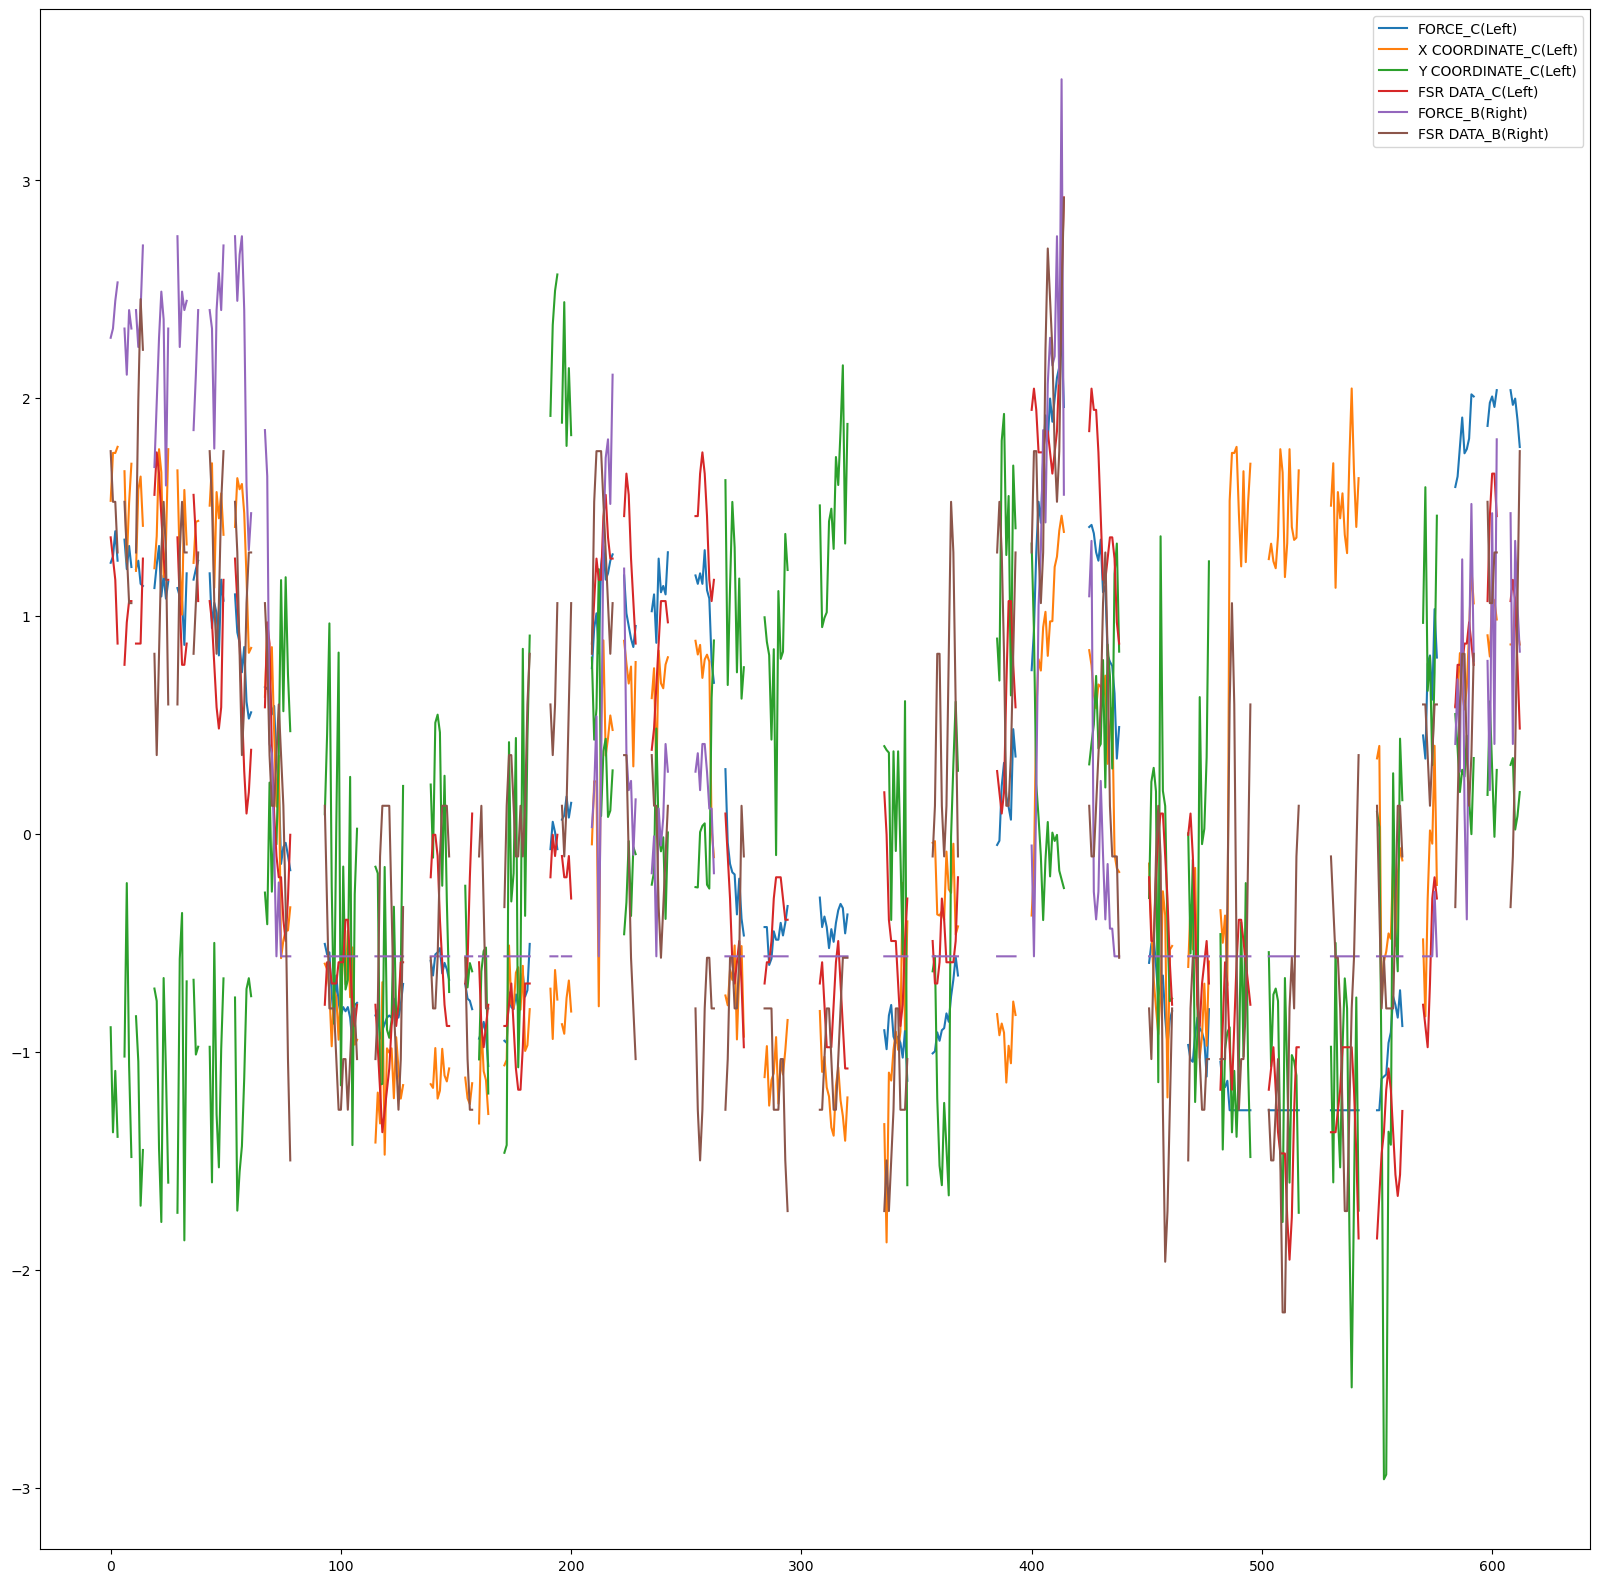

In [36]:
data.plot(figsize=(20,20))

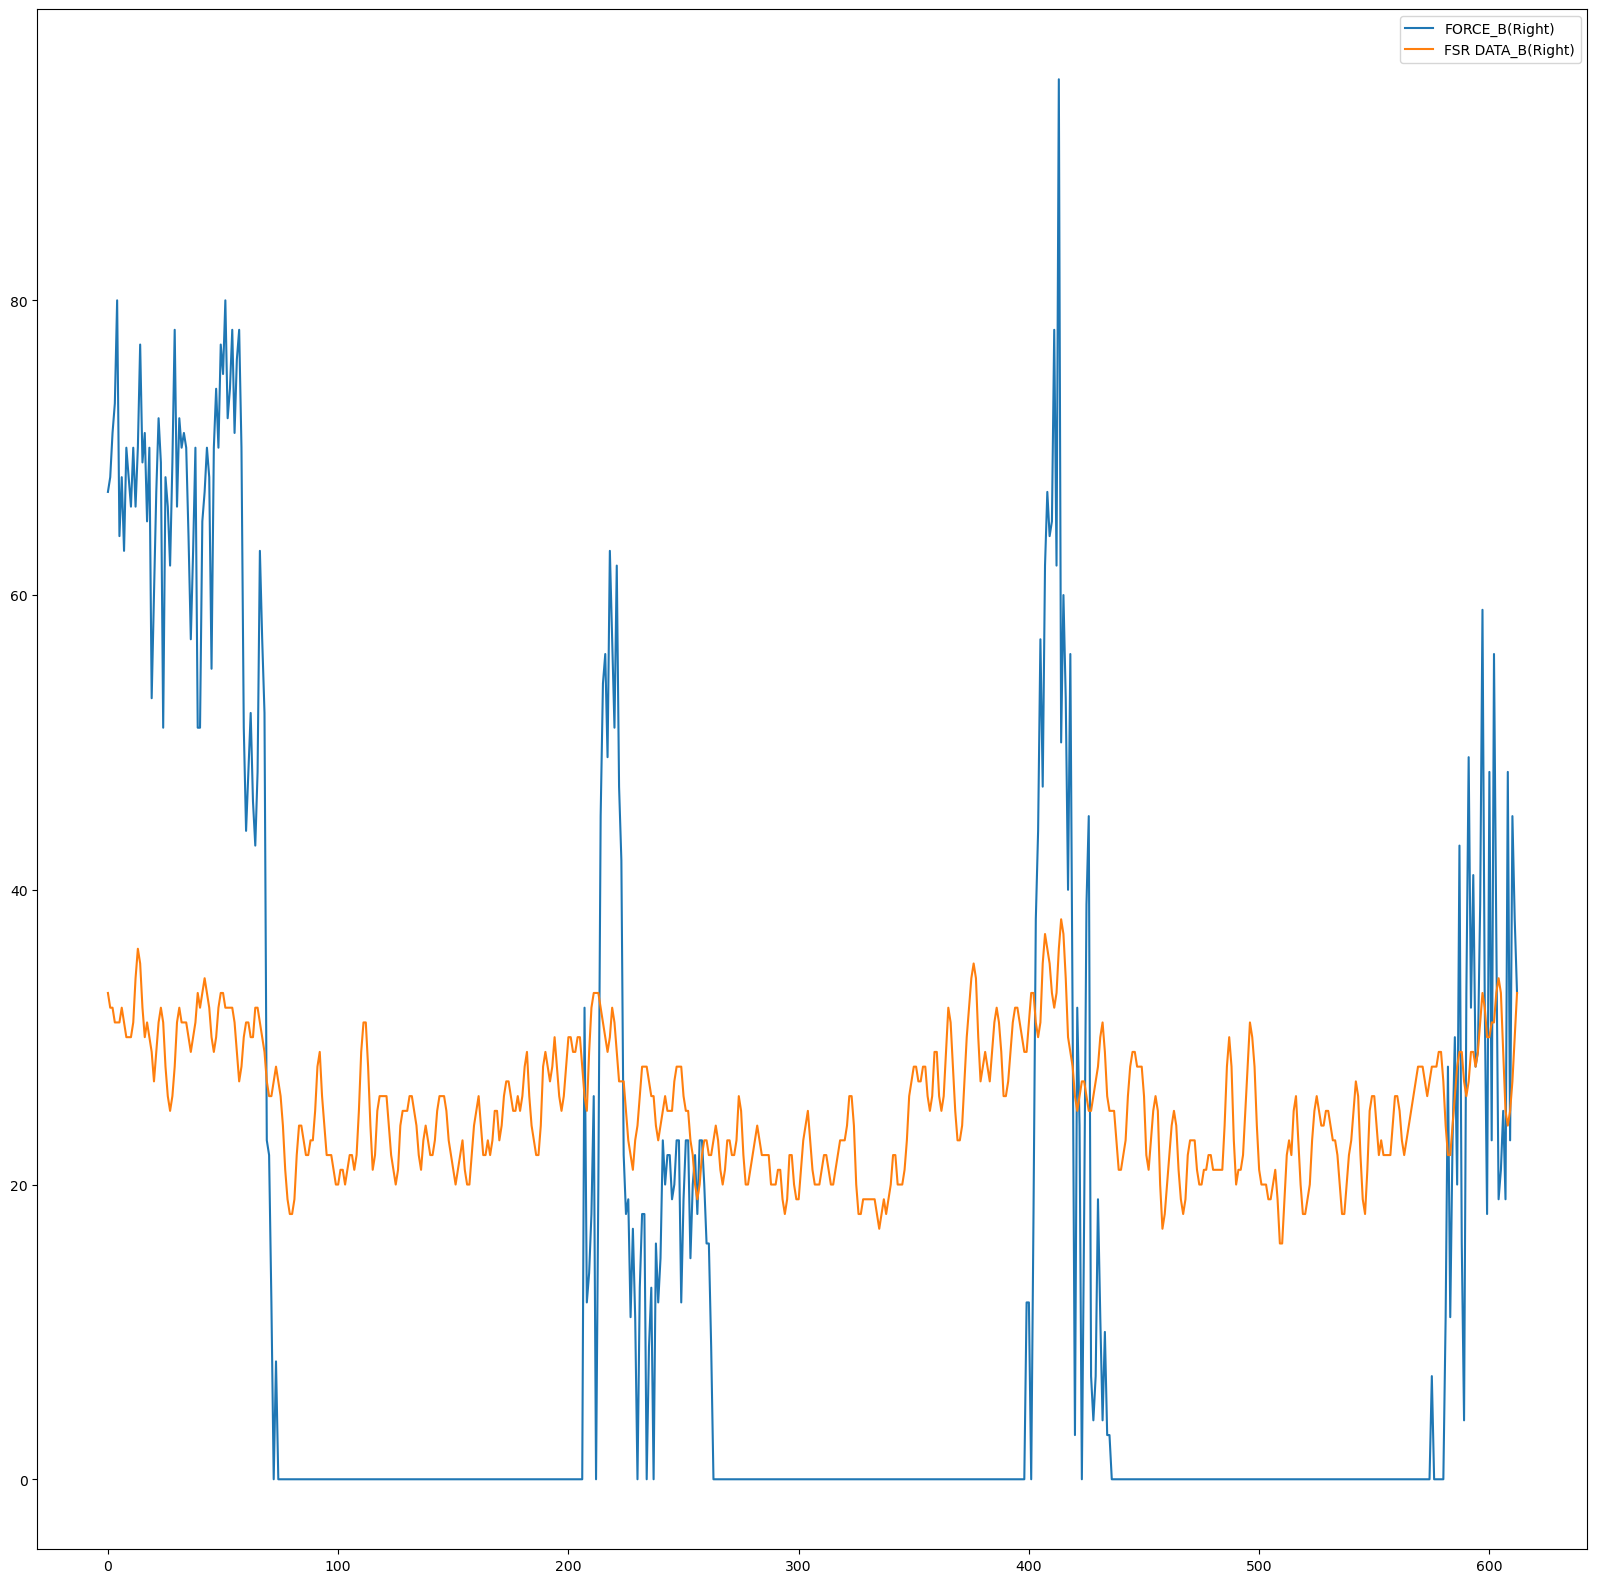

In [37]:
data2=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.10.14/squart.xlsx")

R2=data2.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]

R2.plot(figsize=(20,20))

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
R_scaled=scaler.fit_transform(R2)

R3=pd.DataFrame(data=R_scaled)

R_new=R3.set_axis(["FORCE_B(Right)","FSR DATA_B(Right)"],axis="columns")

<Axes: >

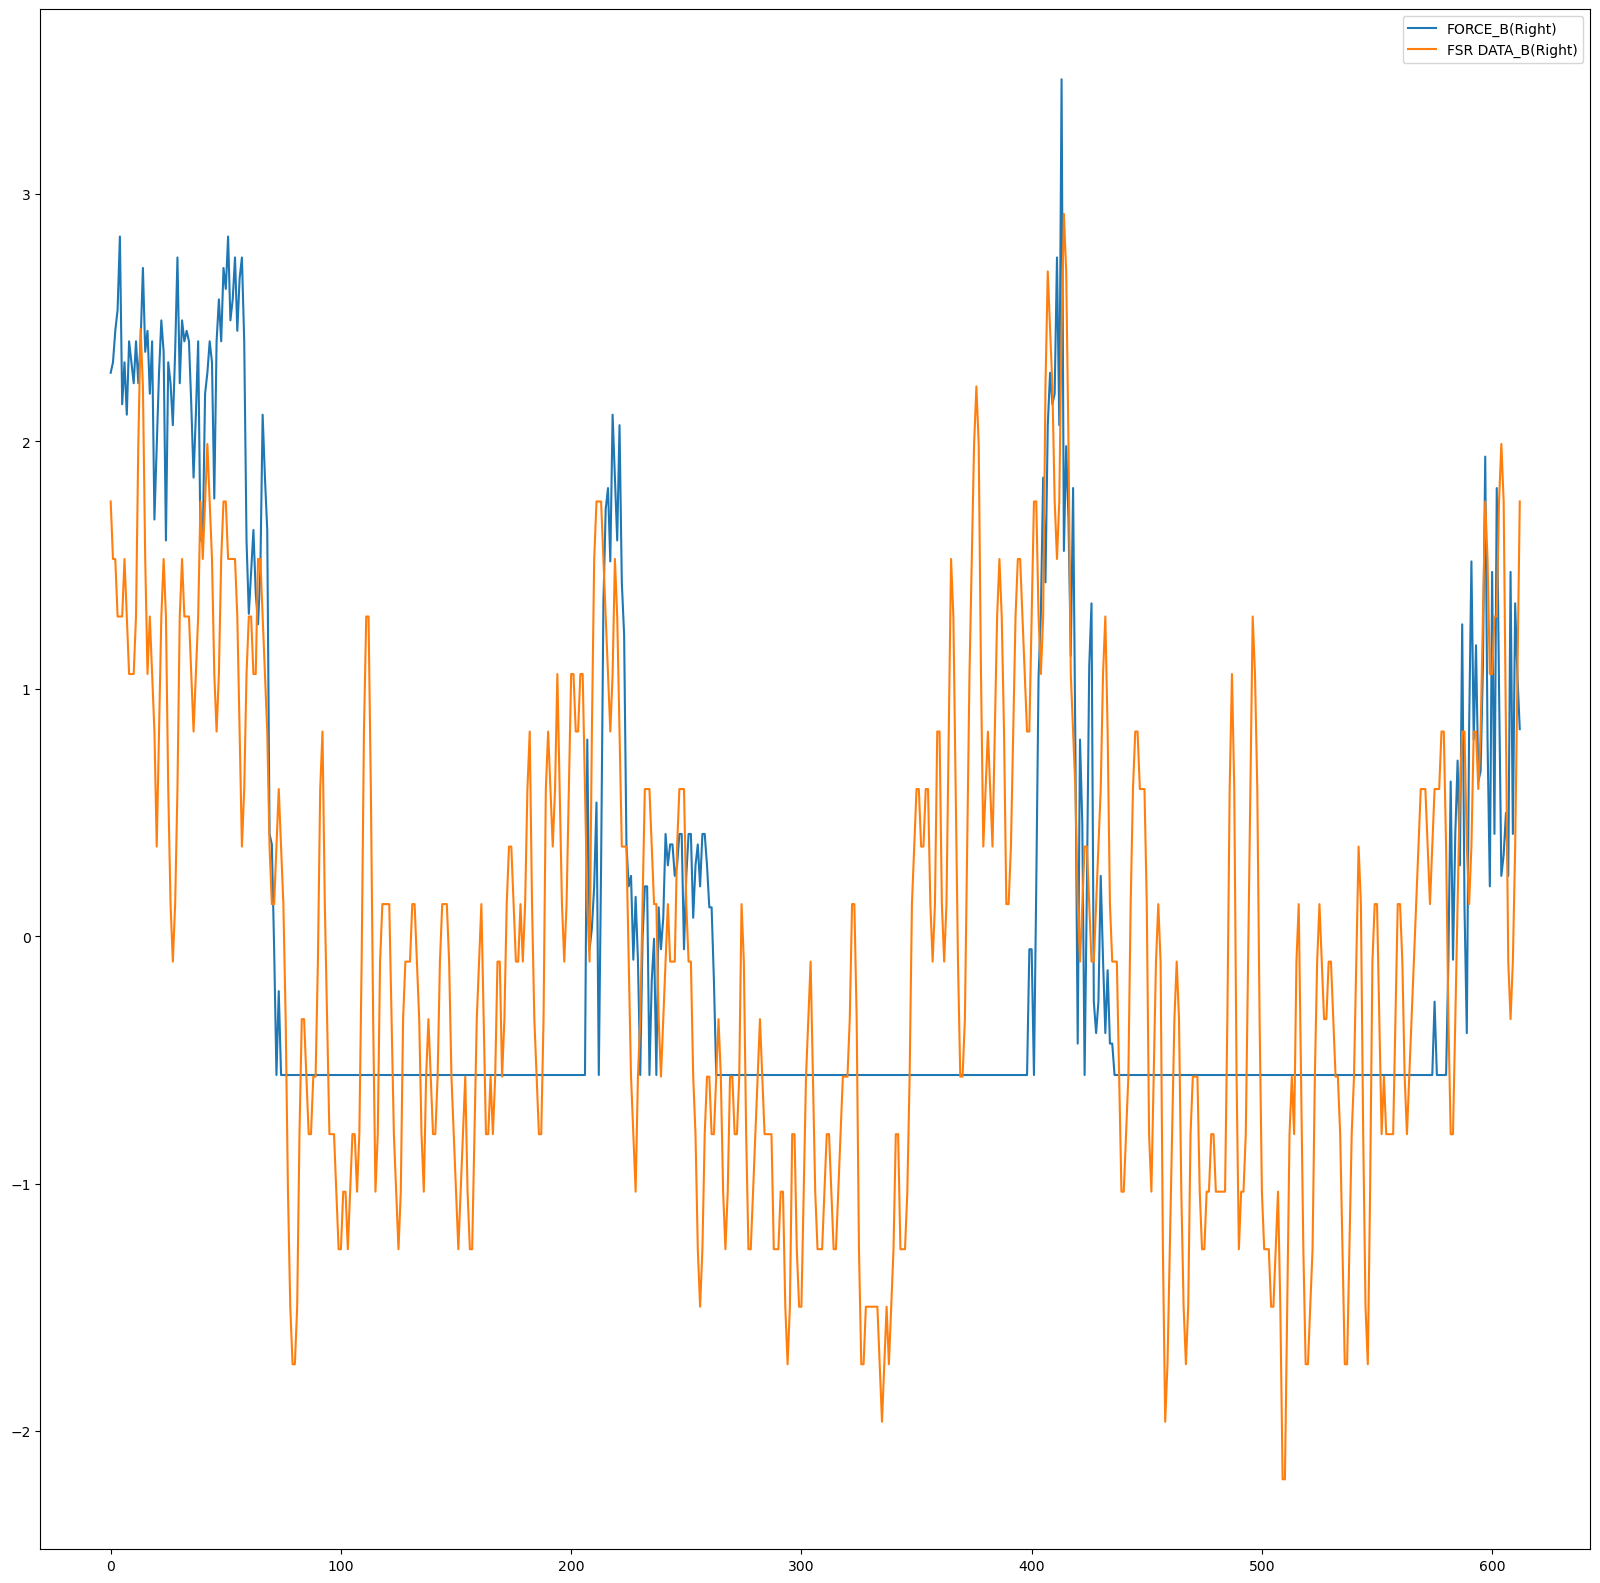

In [38]:
R_new.plot(figsize=(20,20))

In [39]:
R=data.loc[:,['FORCE_B(Right)','FSR DATA_B(Right)']]

<Axes: >

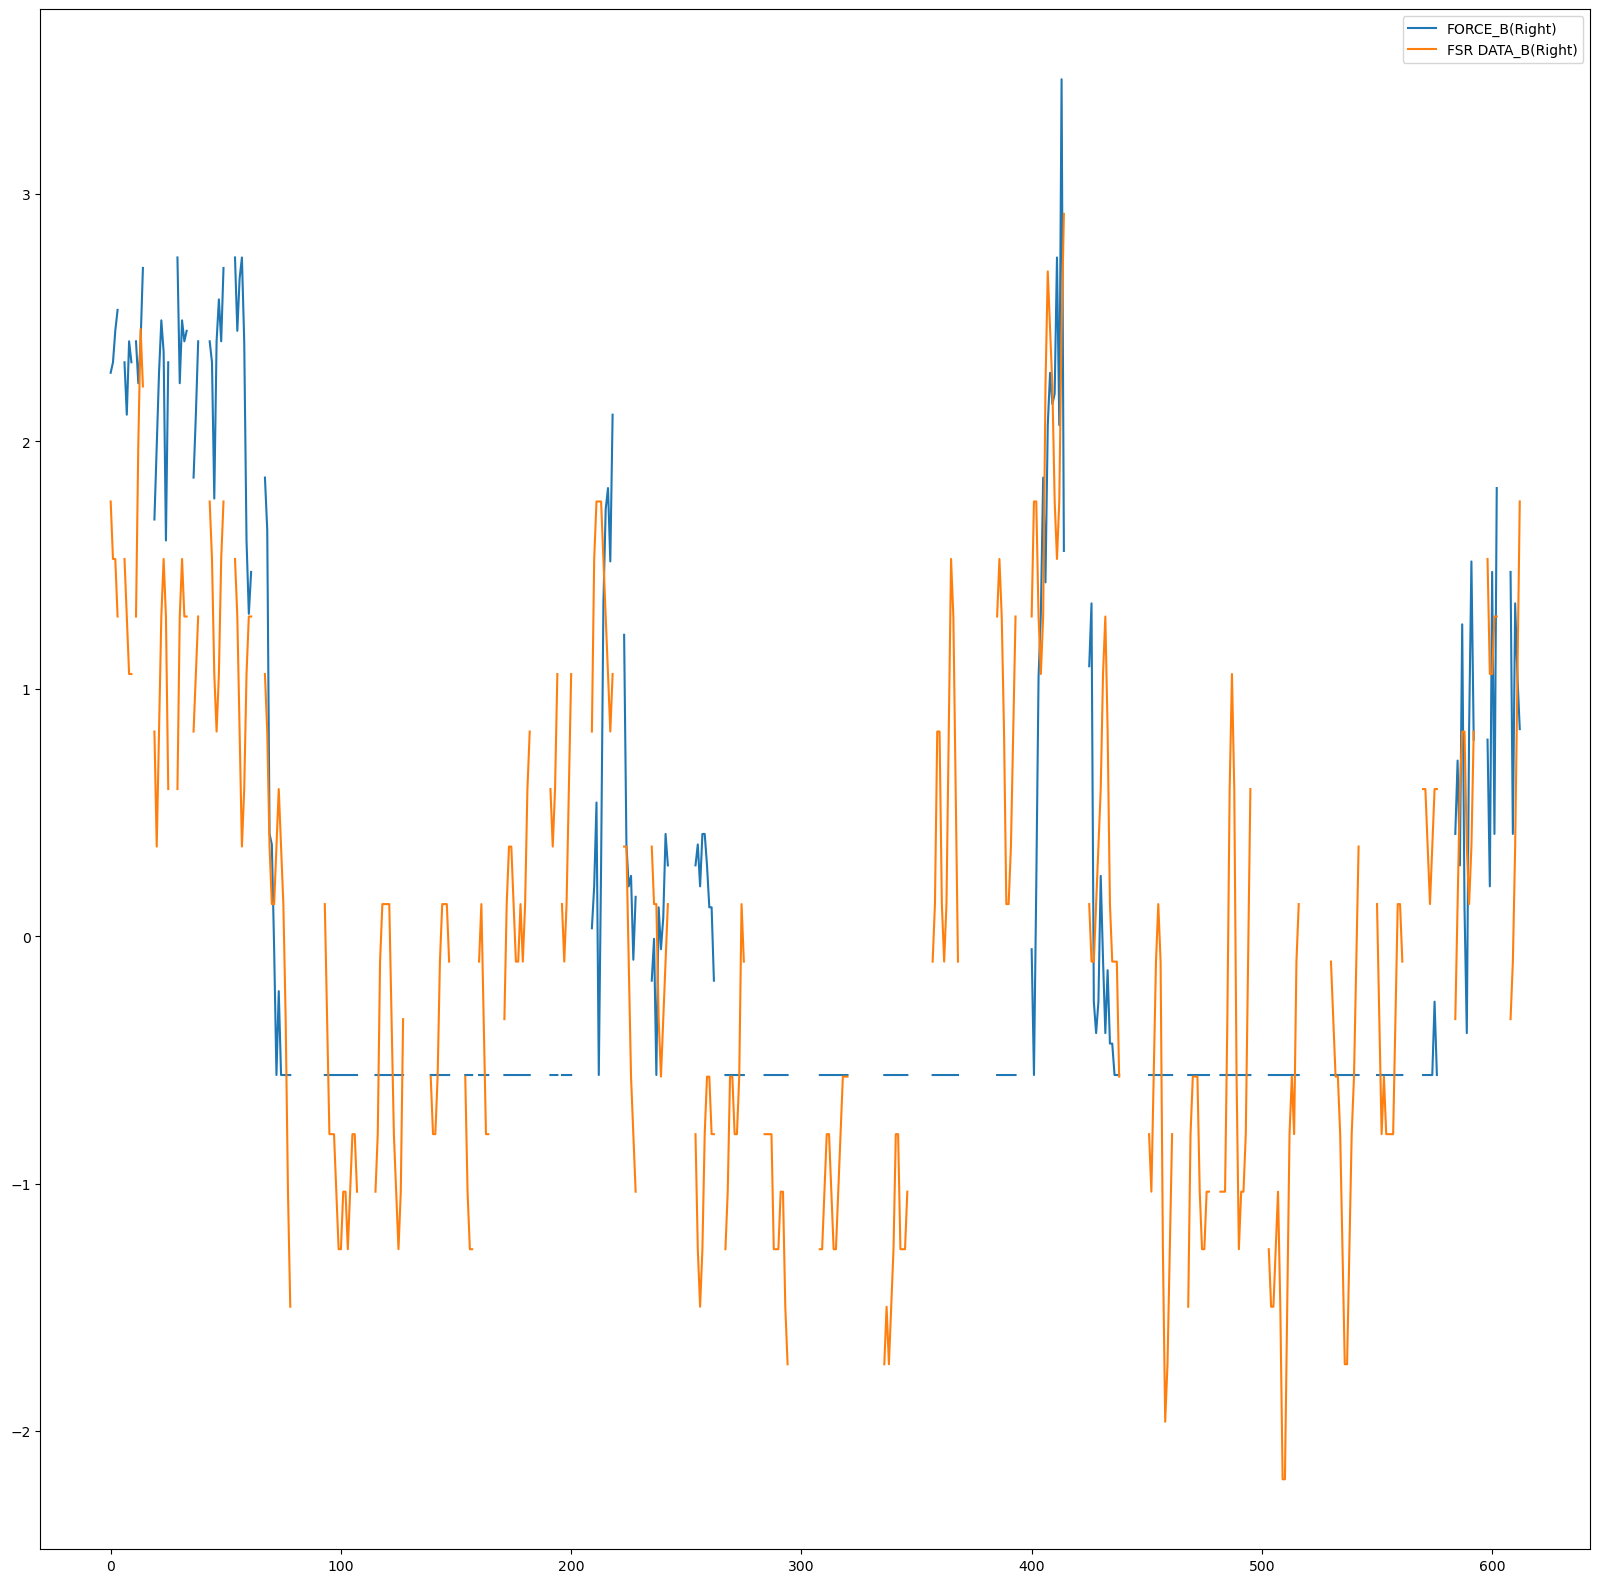

In [40]:
R.plot(figsize=(20,20))

In [41]:
R.isnull().sum()

FORCE_B(Right)       265
FSR DATA_B(Right)    265
dtype: int64

In [42]:
R.columns

Index(['FORCE_B(Right)', 'FSR DATA_B(Right)'], dtype='object')

In [43]:
R_FORECE_B=R.iloc[:,0].copy()
R_FSR_B=R.iloc[:,1].copy()

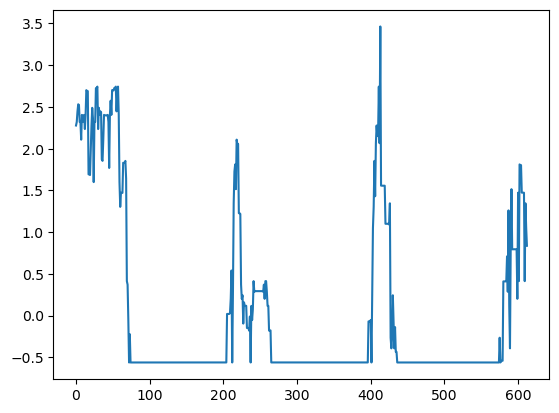

In [63]:
plt.plot(R_FORECE_B,label='R_FORCE_B')

<Axes: >

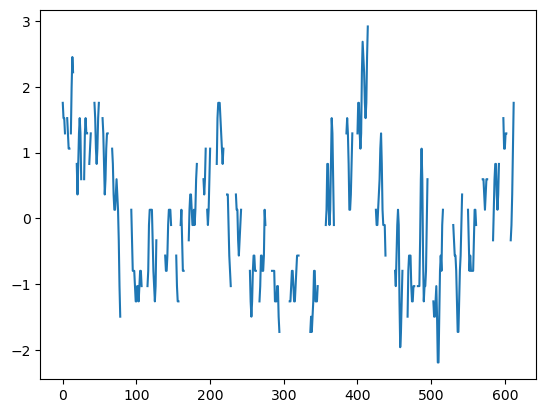

In [45]:
R_FSR_B.plot()

In [46]:
R.columns

Index(['FORCE_B(Right)', 'FSR DATA_B(Right)'], dtype='object')

In [47]:
import numpy as np 

index=R.index

loss_index_R_FORECE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]
loss_index_R_FSR_B=np.array(R.index).reshape(-1,1)[R.iloc[:,1].isna()]



normal_index_R_FORECE_B=np.setdiff1d(index,loss_index_R_FORECE_B)
normal_index_R_FSR_B=np.setdiff1d(index,loss_index_R_FSR_B)


In [48]:
print(loss_index_R_FORECE_B.shape)
print(normal_index_R_FORECE_B.shape)

(265, 1)
(348,)


In [49]:
x_train_R_FORECE_B=normal_index_R_FORECE_B.reshape(-1,1)
y_train_R_FORECE_B=R.iloc[normal_index_R_FORECE_B,0]
x_test_R_FORECE_B=loss_index_R_FSR_B

x_train_R_FSR_B=normal_index_R_FSR_B.reshape(-1,1)
y_train_R_FSR_B=R.iloc[normal_index_R_FSR_B,1]
x_test_R_FSR_B=loss_index_R_FSR_B

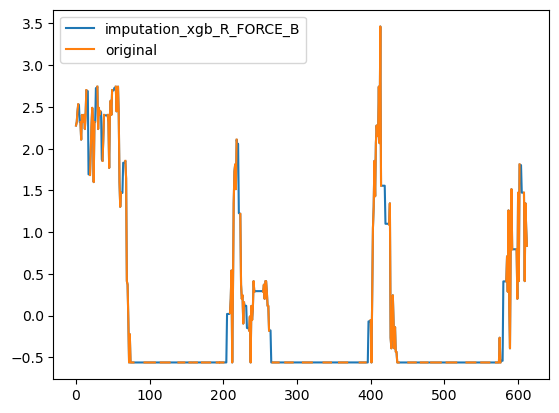

In [50]:
from xgboost.sklearn import XGBRegressor

reg = XGBRegressor().fit(x_train_R_FORECE_B,y_train_R_FORECE_B)
pred=reg.predict(x_test_R_FORECE_B)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_R_FORECE_B:    
    R_FORECE_B[i]=pred[c]
    c+=1
    
    
import matplotlib.pyplot as plt 
plt.plot(R_FORECE_B,label='imputation_xgb_R_FORCE_B')
plt.plot(R.iloc[:,0],label='original')
plt.legend()

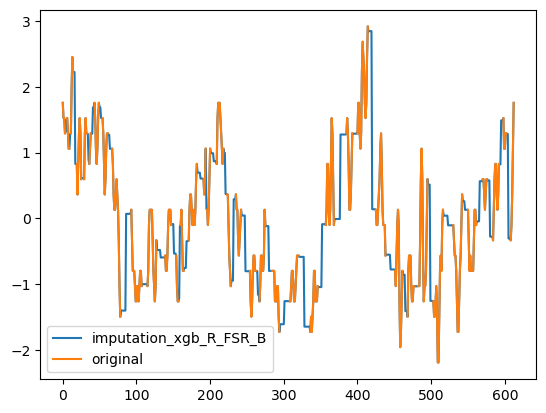

In [51]:
reg = XGBRegressor().fit(x_train_R_FSR_B,y_train_R_FSR_B)
pred=reg.predict(x_test_R_FSR_B)
pred=pred.reshape(-1,1)

c=0
for i in loss_index_R_FSR_B:    
    R_FSR_B[i]=pred[c]
    c+=1
    
    
import matplotlib.pyplot as plt 
plt.plot(R_FSR_B,label='imputation_xgb_R_FSR_B')
plt.plot(R.iloc[:,1],label='original')
plt.legend()

In [52]:
R.isnull().sum()

FORCE_B(Right)       265
FSR DATA_B(Right)    265
dtype: int64

In [53]:
R.columns

Index(['FORCE_B(Right)', 'FSR DATA_B(Right)'], dtype='object')

In [54]:
for i in loss_index_R_FORECE_B:    
    R['FORCE_B(Right)'][i]=R_FORECE_B[i]
    
for i in loss_index_R_FSR_B:    
    R['FSR DATA_B(Right)'][i]=R_FSR_B[i]
    

    
R.isnull().sum()

FORCE_B(Right)       0
FSR DATA_B(Right)    0
dtype: int64

<Axes: >

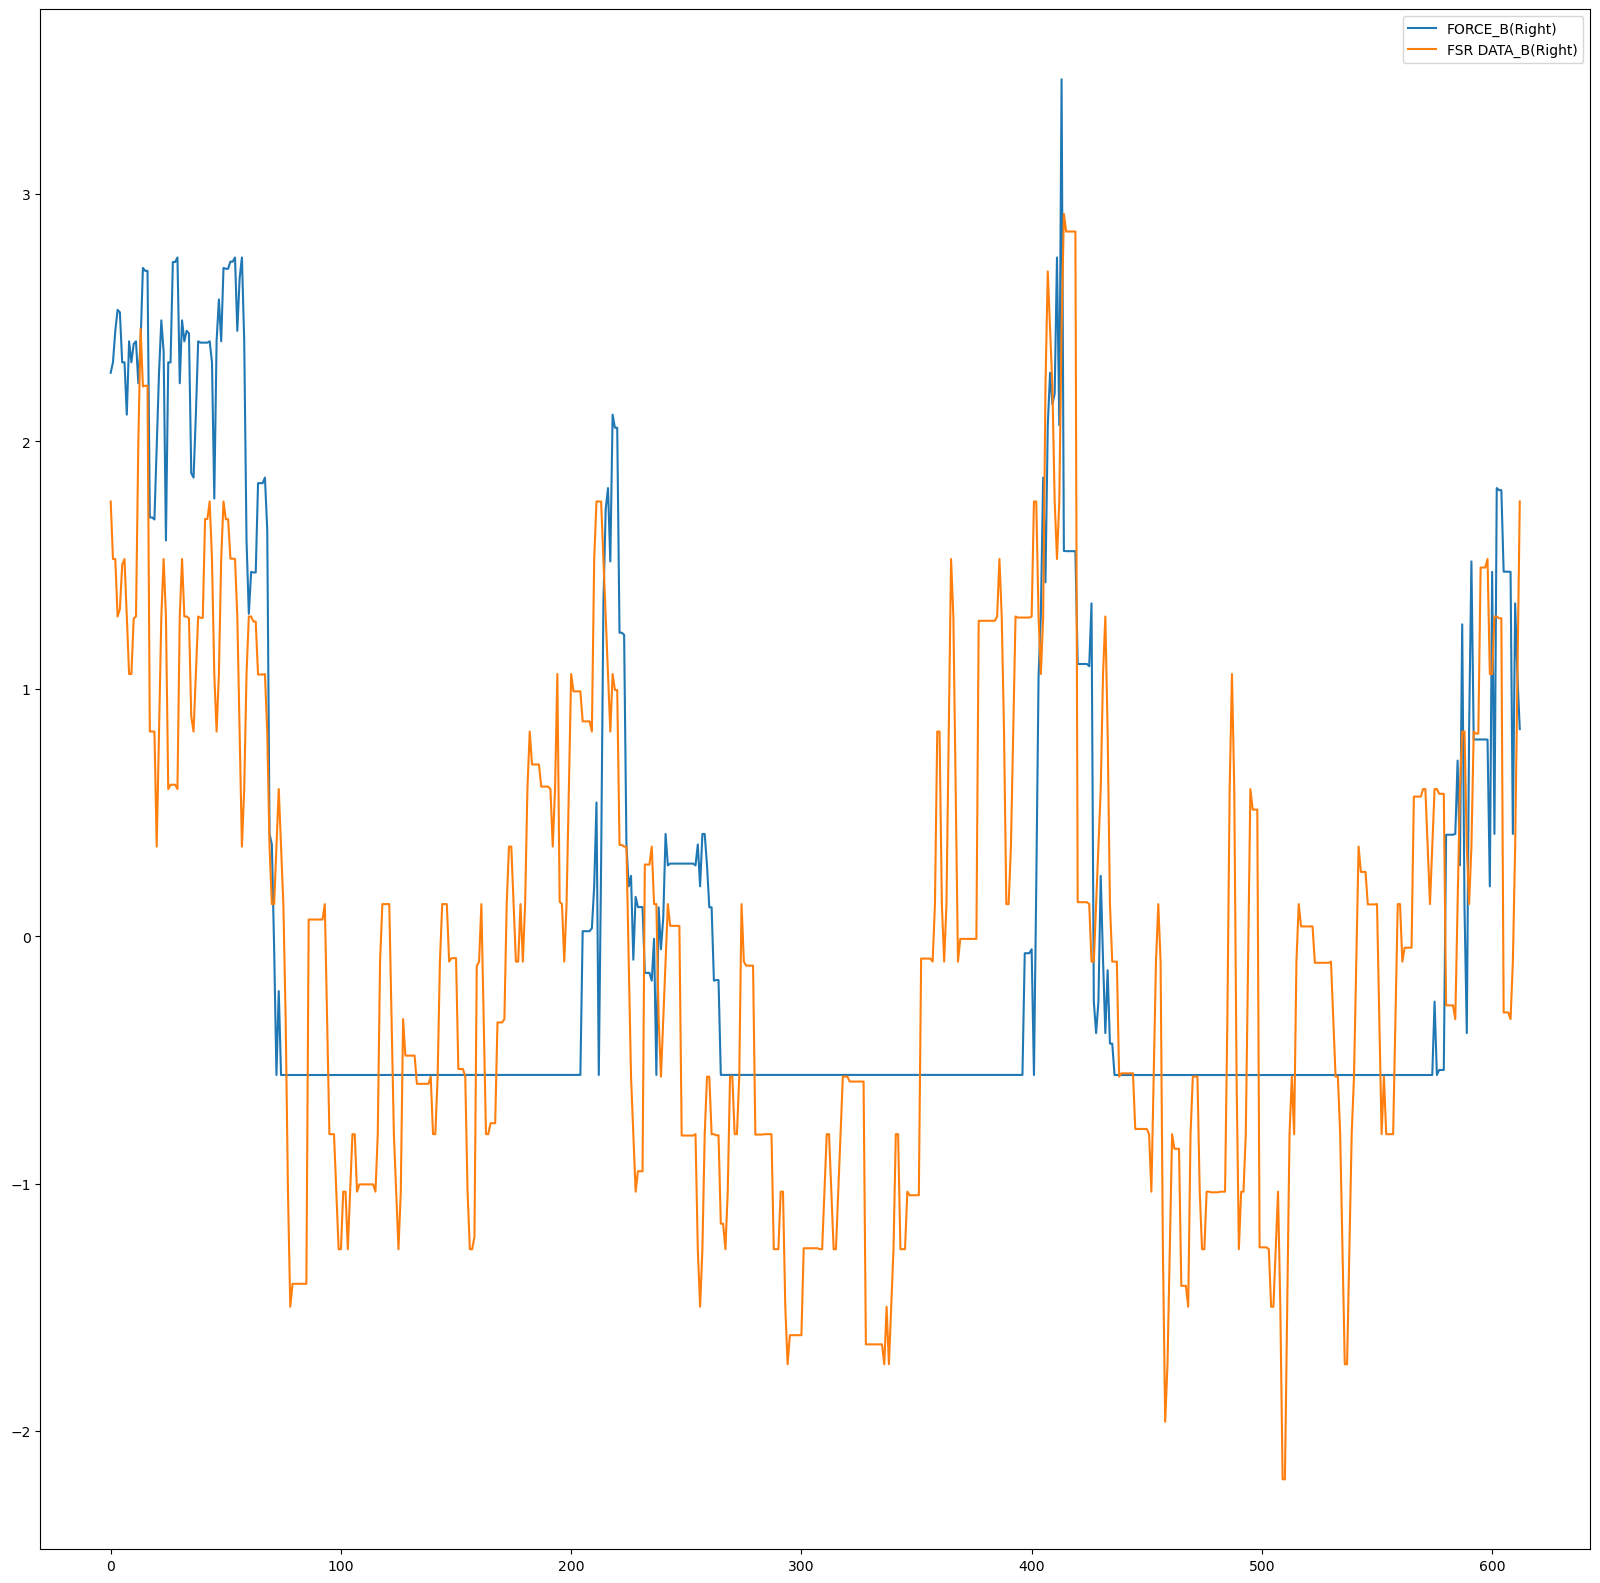

In [55]:
R.plot(figsize=(20,20))

In [56]:
R = pd.DataFrame(scaler.inverse_transform(R))

In [57]:
R_sca=R.set_axis(["FORCE_B(Right)","FSR DATA_B(Right)"],axis="columns")

In [58]:
R_sca

,FORCE_B(Right),FSR DATA_B(Right)
0,67.000000,33.000000
1,68.000000,32.000000
2,71.000000,32.000000
3,73.000000,31.000000
4,72.770675,31.129052
...,...,...
608,48.000000,24.000000
609,23.000000,25.000000
610,45.000000,27.000000
611,38.000000,30.000000


<Axes: >

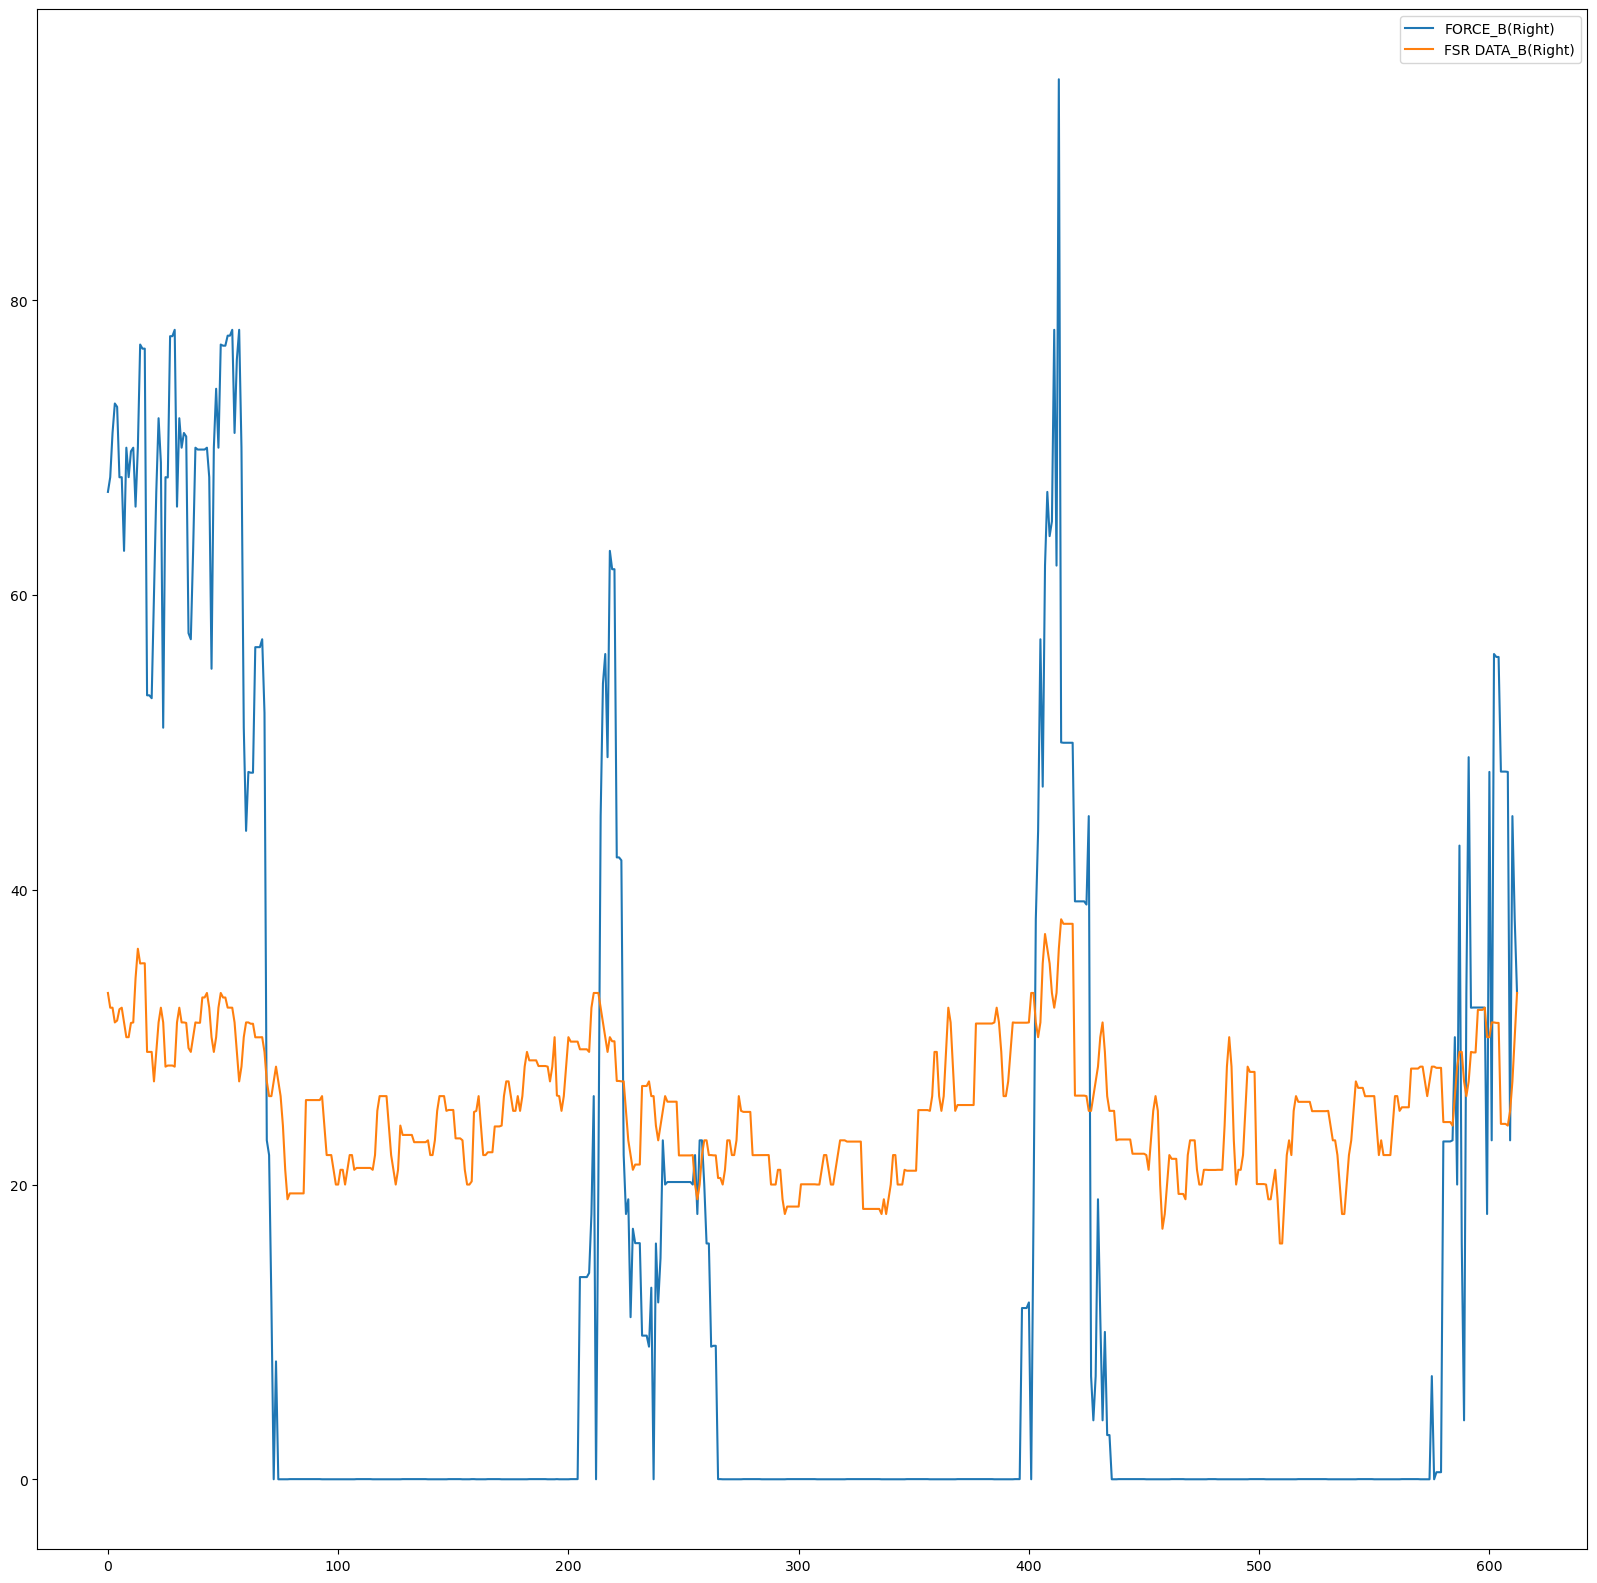

In [59]:
R_sca.plot(figsize=(20,20))